# 1. Exploratory data analysis (EDA), standarization and encoding

In [73]:
# Data handling
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Standarization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats

# Encoding
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

# Plots
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocessing and modeling
plt.rcParams['figure.figsize'] = (10,8)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Pepinillo
import pickle

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Reads csv
df_train = pd.read_csv('../data/train.csv', index_col=0)
df_train.reset_index(drop = False, inplace = True)
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


### Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour
- clarity: a measurement of how clear the diamond is
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

# Exploratory data analysis (EDA)

### General information:

In [75]:
df_train.shape

(40455, 11)

In [76]:
df_train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [78]:
df_train.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


In [79]:
df_train.describe(include='object').T

,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


### Nulls and duplicates:

In [80]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [81]:
# df_train[df_train.duplicated() == True].value_counts().sum()
df_train.duplicated().sum()

0

In [82]:
df_train.drop_duplicates(inplace=True)

In [83]:
df_train.duplicated().sum()

0

## Variables:
- Response: 
    - Numeric: price
- Predict:
    - Numeric: carat, depth, table, x, y, z
    - Categoric: cut, color, clarity

## Prediction variables:

#### Numeric:

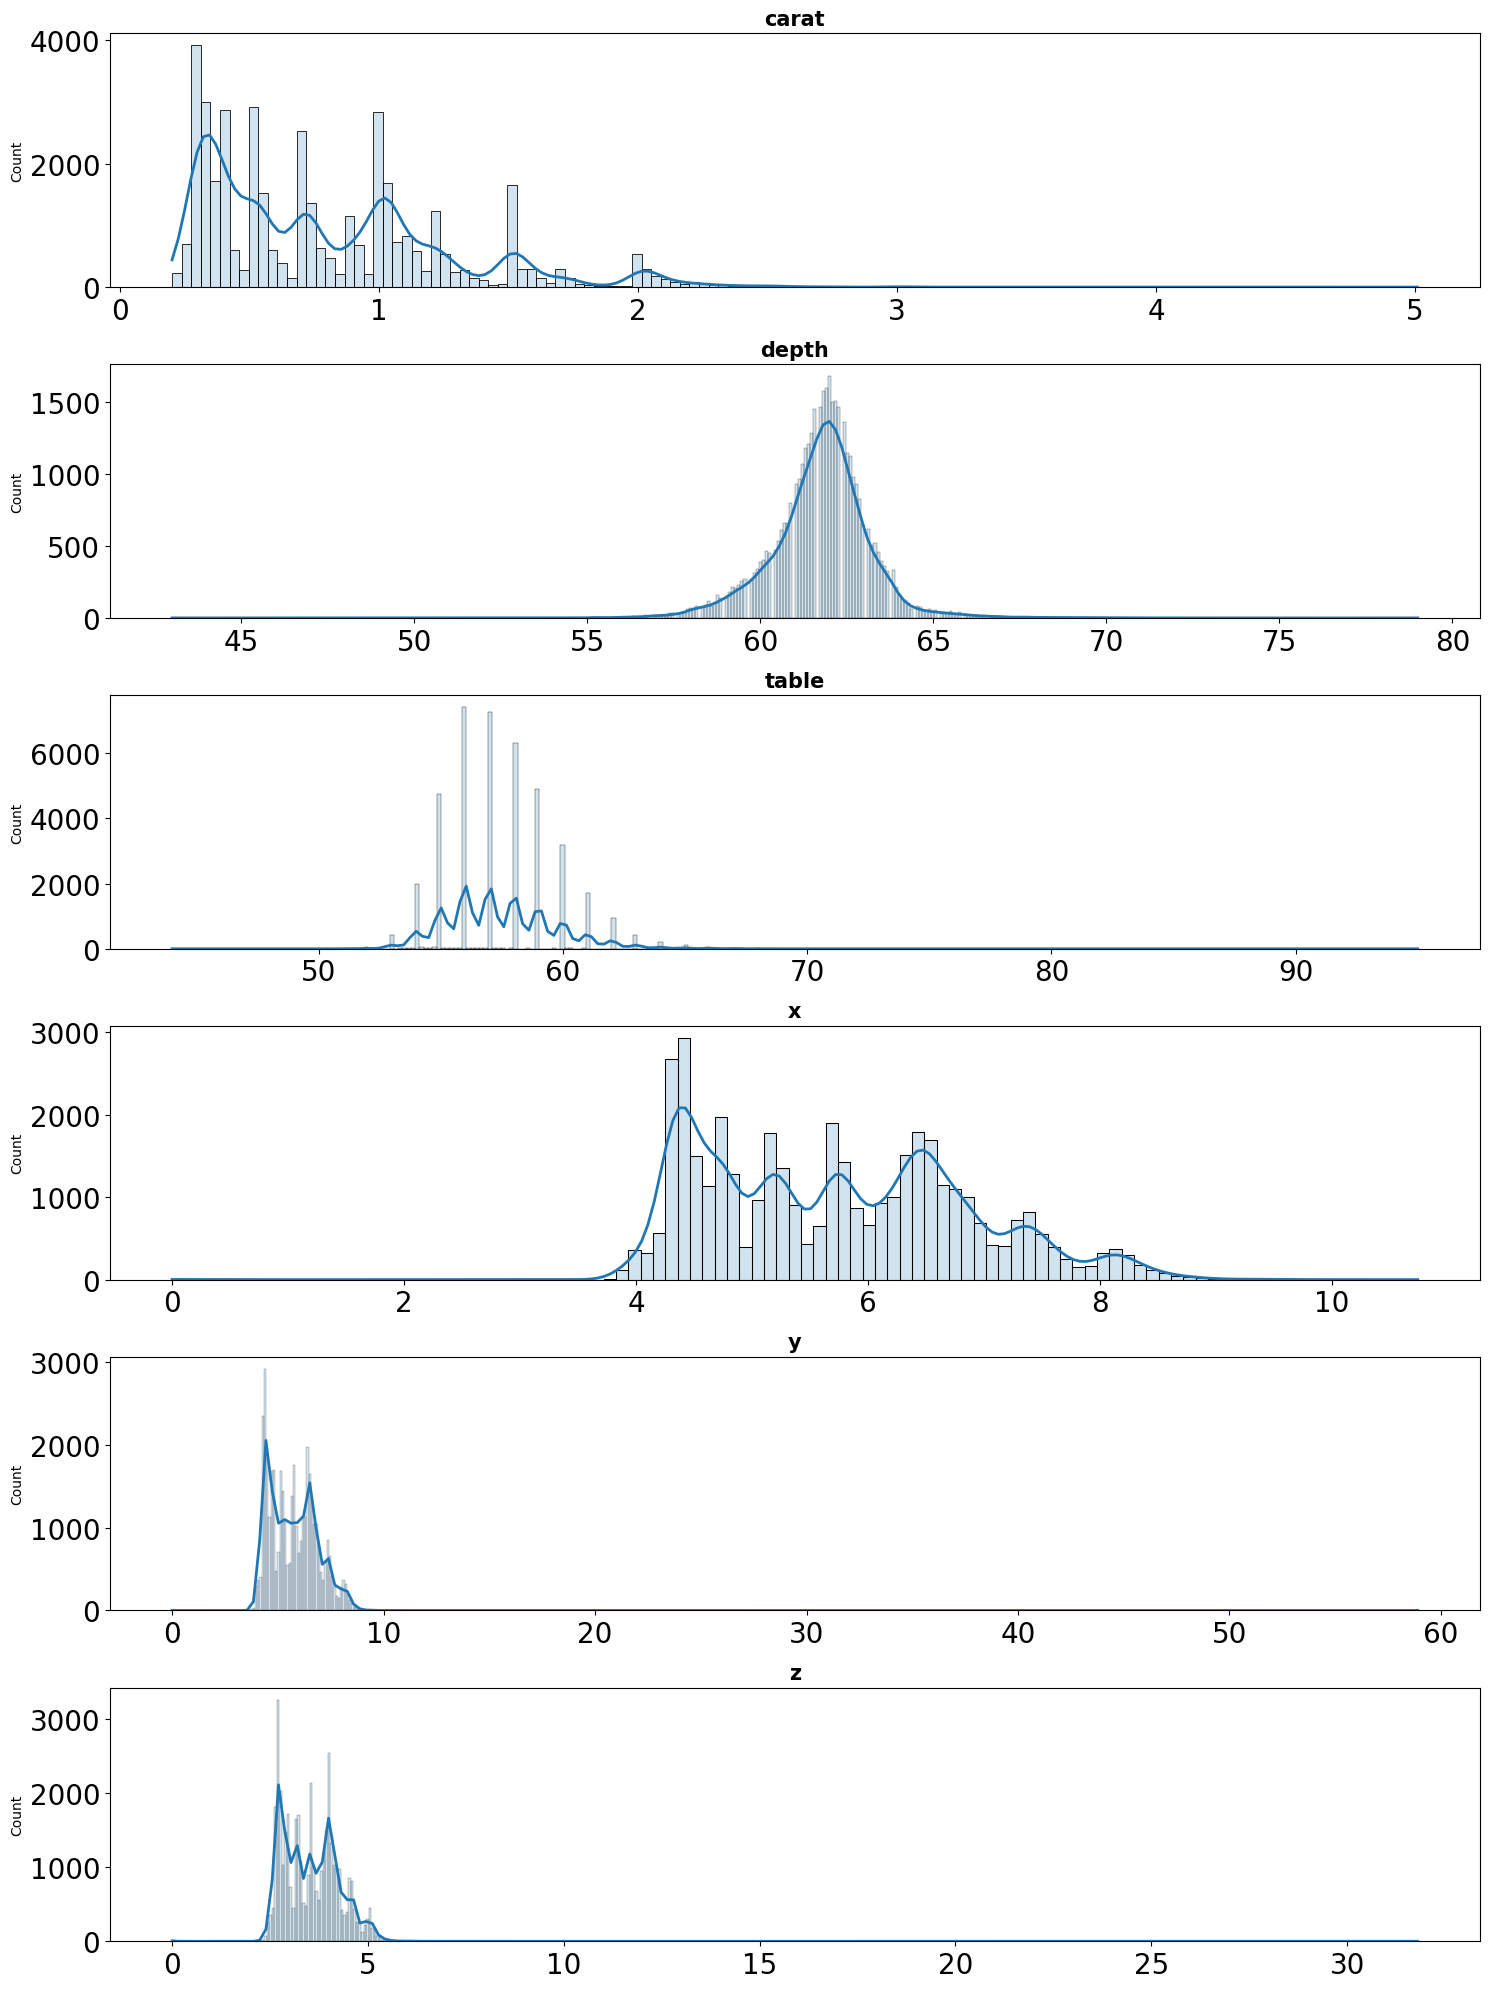

In [84]:
# Numeric variables viz:

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 20))

axes = axes.flat

columnas_numeric = df_train.drop(['id', 'price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(columnas_numeric.columns): 
    sns.histplot(
        data=columnas_numeric,
        x=colum,
        kde=True, 
        line_kws={'linewidth': 2}, 
        alpha=0.2, 
        ax=axes[i])

    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')

fig.tight_layout();

#### Categoric:

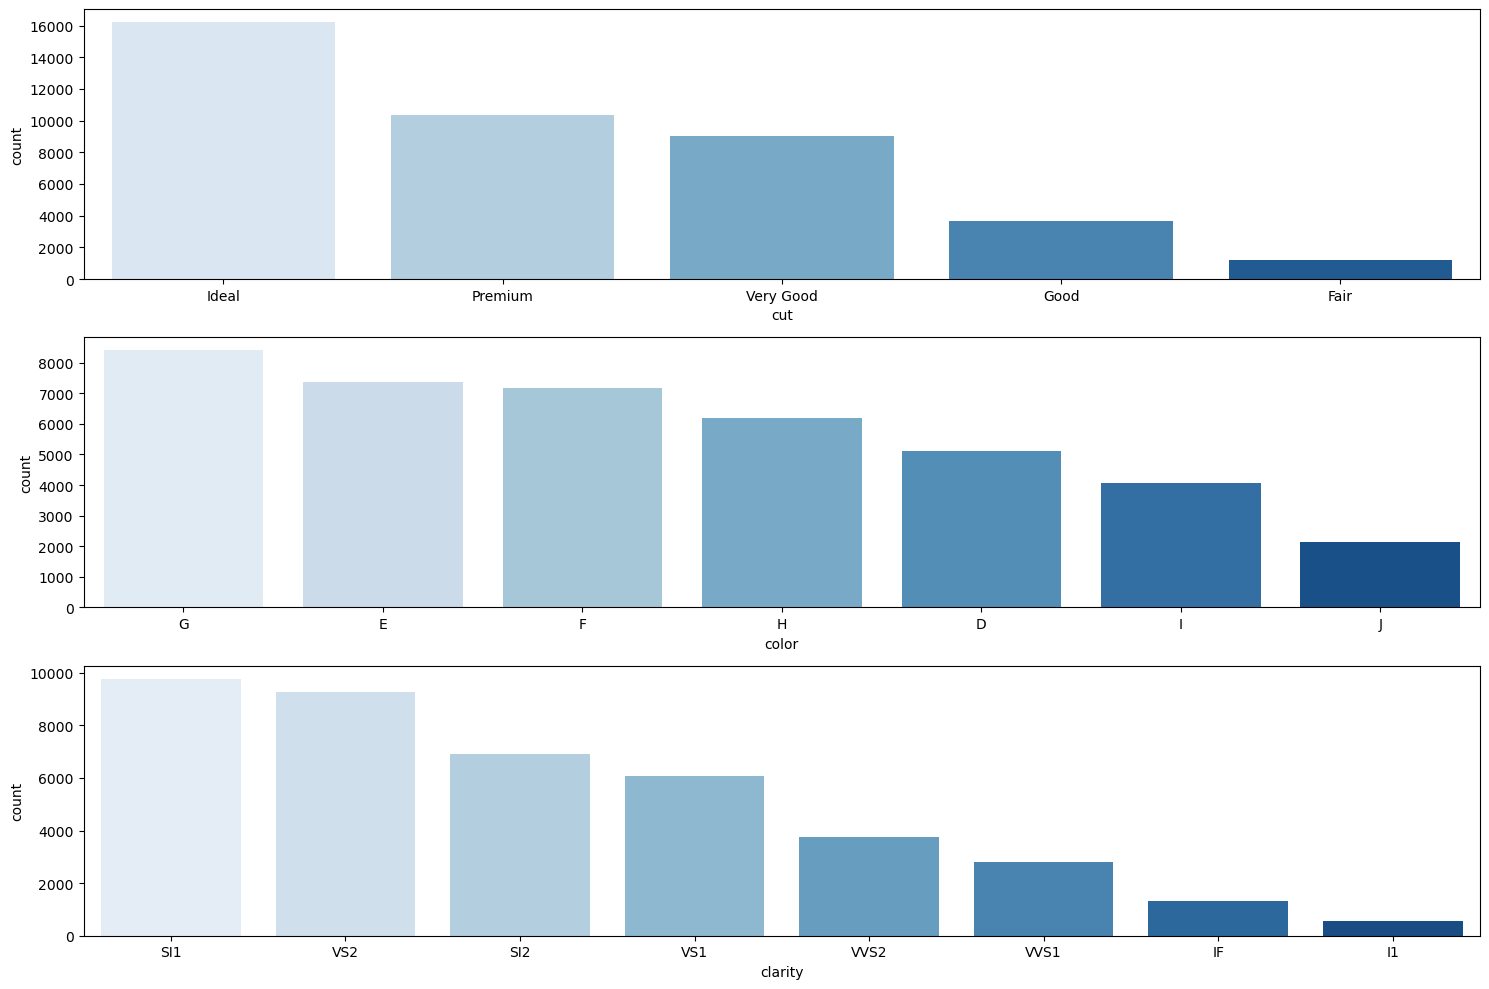

In [85]:
# Categoric variables viz:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):
    sns.countplot(
                x=df_train[col], 
                ax=axes[i],
                palette='Blues',
                order=df_train[col].value_counts().index)

fig.tight_layout();

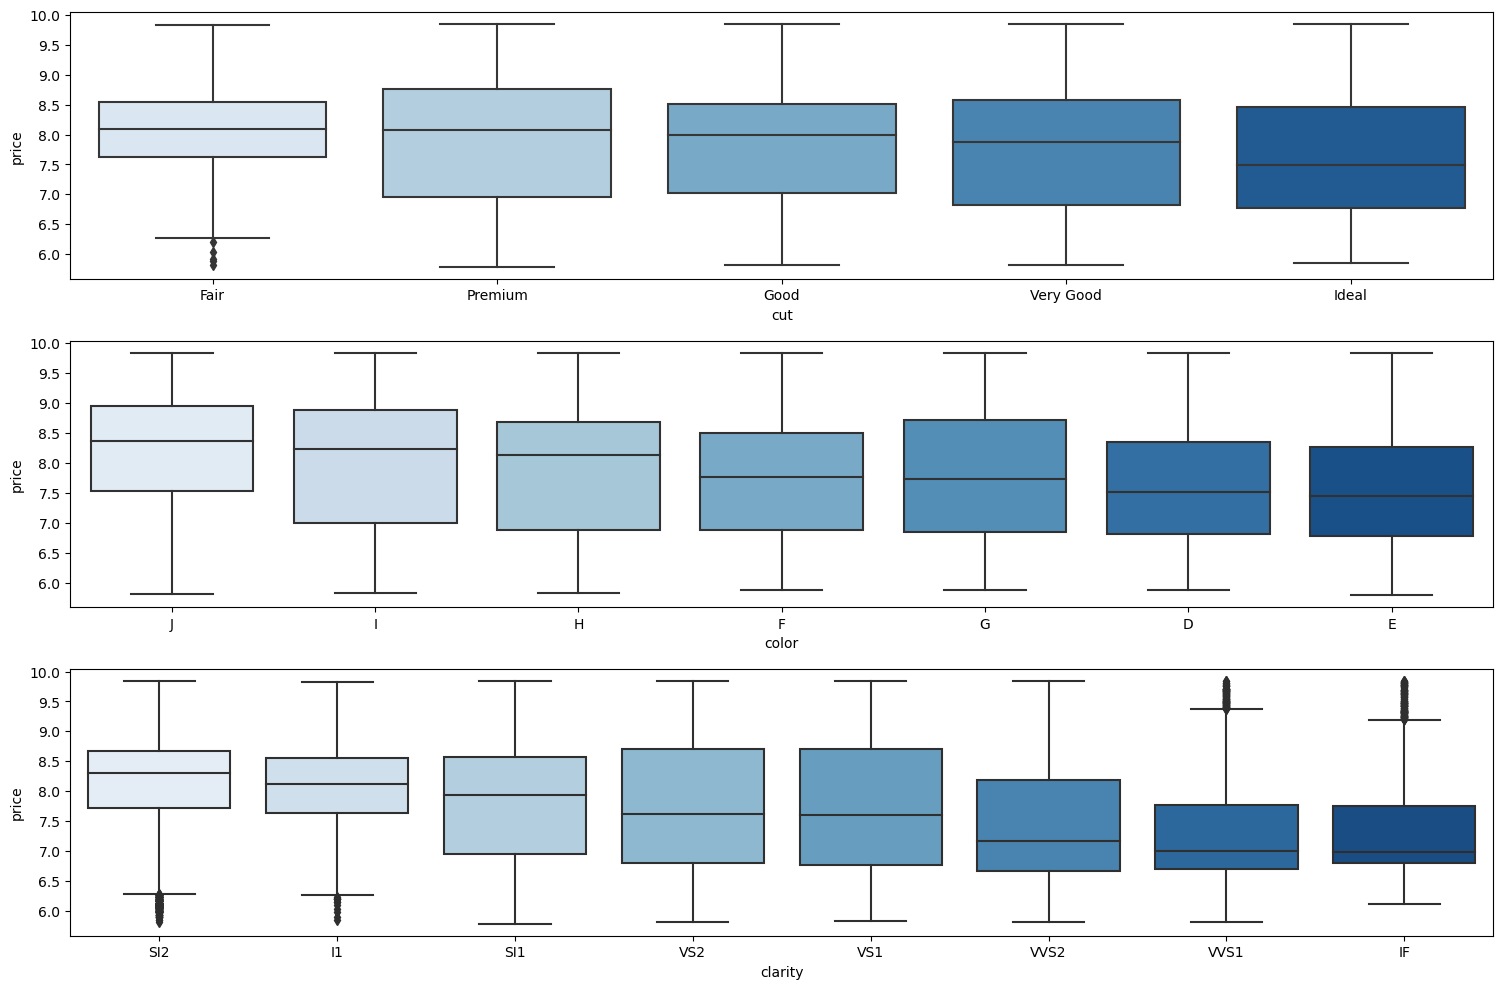

In [86]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

axes = axes.flat

columnas_categoric = df_train.select_dtypes(include='object').columns

for i, col in enumerate(columnas_categoric):

    my_order = df_train.groupby(col)['price'].median().sort_values(ascending=False).index
    sns.boxplot(
                x=df_train[col],
                y=df_train.price,
                ax=axes[i],
                palette='Blues',
                order=my_order)

fig.tight_layout();

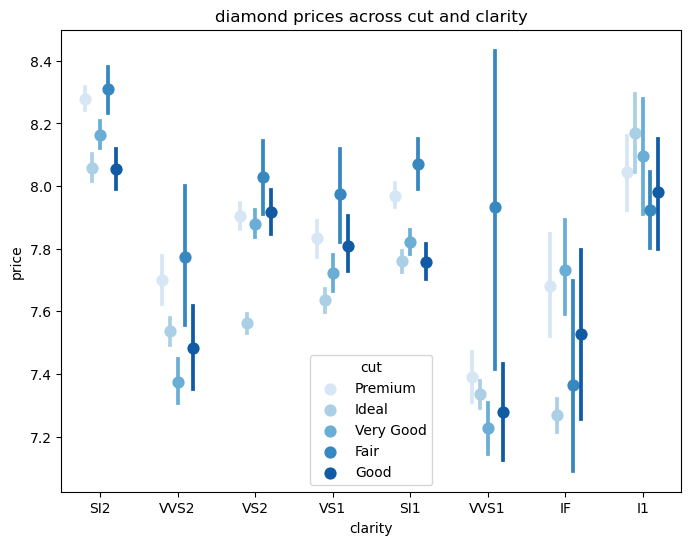

In [87]:
fig = plt.figure(figsize = [8,6])

ax = sns.pointplot(data = df_train, x = 'clarity', y = 'price', hue = 'cut',
           palette = 'Blues', linestyles = '', dodge = 0.4)

plt.title('diamond prices across cut and clarity')
plt.ylabel('price')
ax.set_yticklabels([], minor = True)

plt.show();

### Outliers

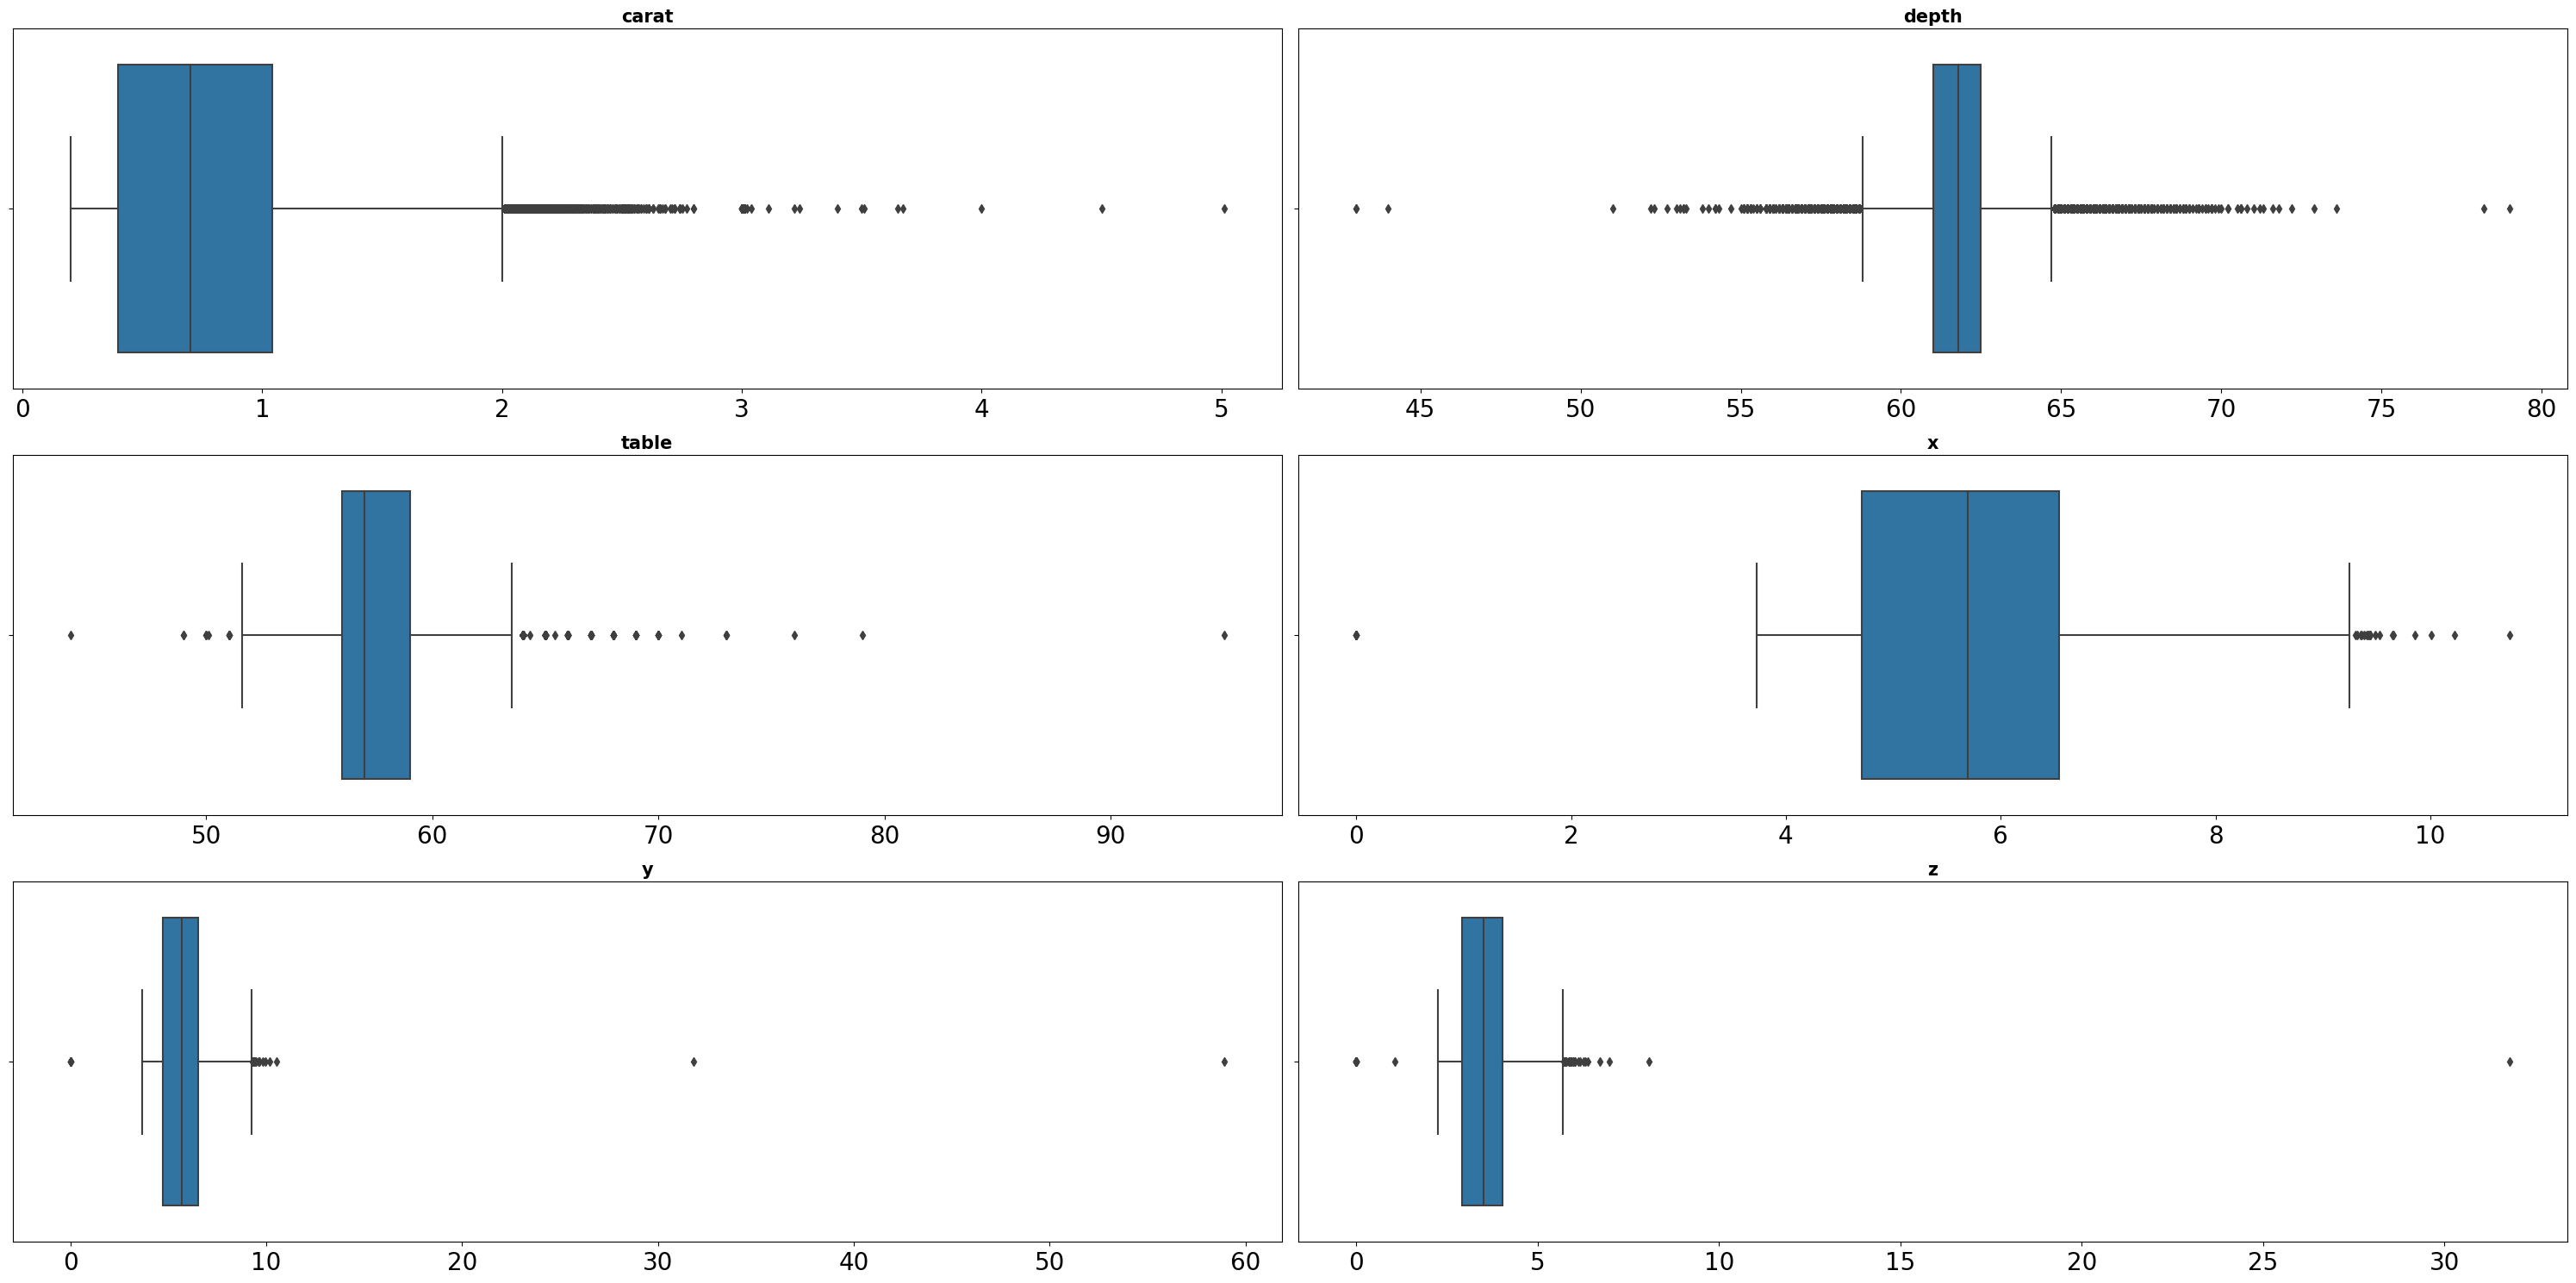

In [88]:
# Outliers in numeric cols:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))

axes = axes.flat

numeric_cols = df_train.drop(['id', 'price'], axis=1).select_dtypes(include=np.number)

for i, colum in enumerate(numeric_cols.columns): 
    sns.boxplot(
        data=df_train,
        x=colum,  
        ax=axes[i])
    
    axes[i].set_title(colum, fontsize=15, fontweight='bold')
    axes[i].tick_params(labelsize=20)
    axes[i].set_xlabel('')

fig.tight_layout();

In [89]:
# Counts outliers per column

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 
    
    for col in lista_columnas:
        
        Q1 = np.nanpercentile(df_train[col], 25)
        Q3 = np.nanpercentile(df_train[col], 75)
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0:
        
            dicc_indices[col] = len(list(outliers_data.index)) # by removing len you get the outliers indexes for each col
        
    return dicc_indices 

ind = detectar_outliers(columnas_numeric, df_train)
ind

{'carat': 1450, 'depth': 1907, 'table': 448, 'x': 26, 'y': 23, 'z': 44}

In [90]:
'''valores = list(ind.values())
valores = [indice for sublista in valores for indice in sublista]
valores = set(valores)
df_train.drop(df_train.index[list(valores)], inplace=True)''';

In [91]:
'''df_train = df_train[df_train["carat"] < np.percentile(df_train["carat"], 75)]
df_train = df_train[df_train["depth"] > np.percentile(df_train["depth"], 25)]
df_train = df_train[df_train["depth"] < np.percentile(df_train["depth"], 75)]
df_train = df_train[df_train["table"] < np.percentile(df_train["table"], 75)]
df_train = df_train[df_train["table"] > np.percentile(df_train["table"], 25)]
df_train = df_train[df_train["y"] < np.percentile(df_train["y"], 75)]
df_train = df_train[df_train["z"] < np.percentile(df_train["z"], 75)]''';

In [92]:
'''ind = detectar_outliers(columnas_numeric, df_train)
ind''';

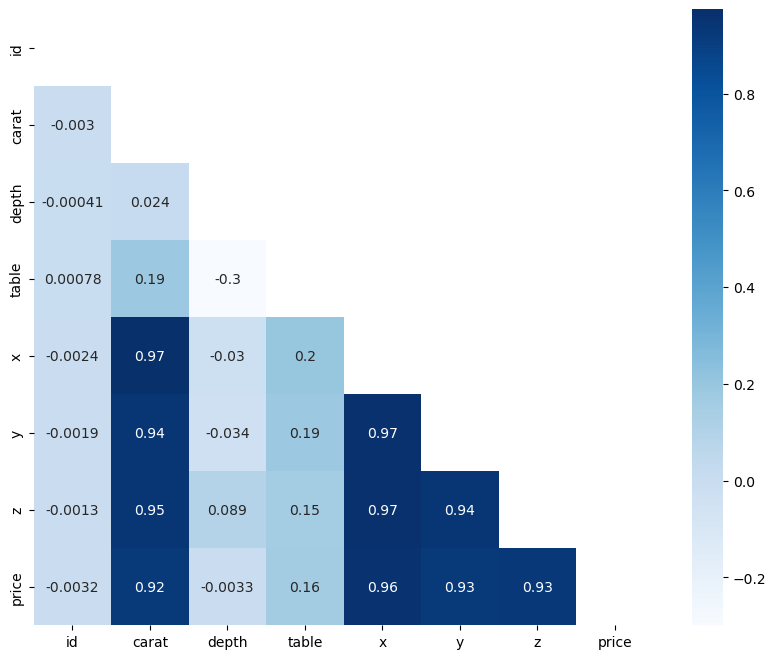

In [93]:
# Correlation matrix:

mask = np.triu(np.ones_like(df_train.corr(numeric_only=True), dtype=np.bool_))
sns.heatmap(df_train.corr(numeric_only=True), 
            cmap='Blues', 
            mask=mask,
            annot=True);

# standarization

In [94]:
def standardize_numeric_data(df, cols):
    
    robust = RobustScaler()
    robust.fit(df[cols])
    
    X_robust = robust.transform(df[cols])
    df[cols] = X_robust

    return df

In [95]:
numeric_cols = df_train.select_dtypes(include=np.number).drop(['id', 'price'], axis=1).columns

In [96]:
df_train = standardize_numeric_data(df_train, numeric_cols)

# encoding

In [97]:
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,-0.625000,Premium,D,SI2,0.400000,0.333333,-0.754098,-0.780220,-0.750000,6.353
1,1,0.484375,Ideal,E,VVS2,0.600000,-0.333333,0.398907,0.417582,0.464286,9.183
2,2,0.031250,Ideal,F,VS2,0.000000,0.666667,0.010929,0.021978,0.017857,7.983
3,3,0.593750,Very Good,G,SI2,0.933333,0.000000,0.464481,0.439560,0.535714,8.371
4,4,-0.531250,Premium,G,VS1,0.333333,0.666667,-0.650273,-0.631868,-0.625000,6.588


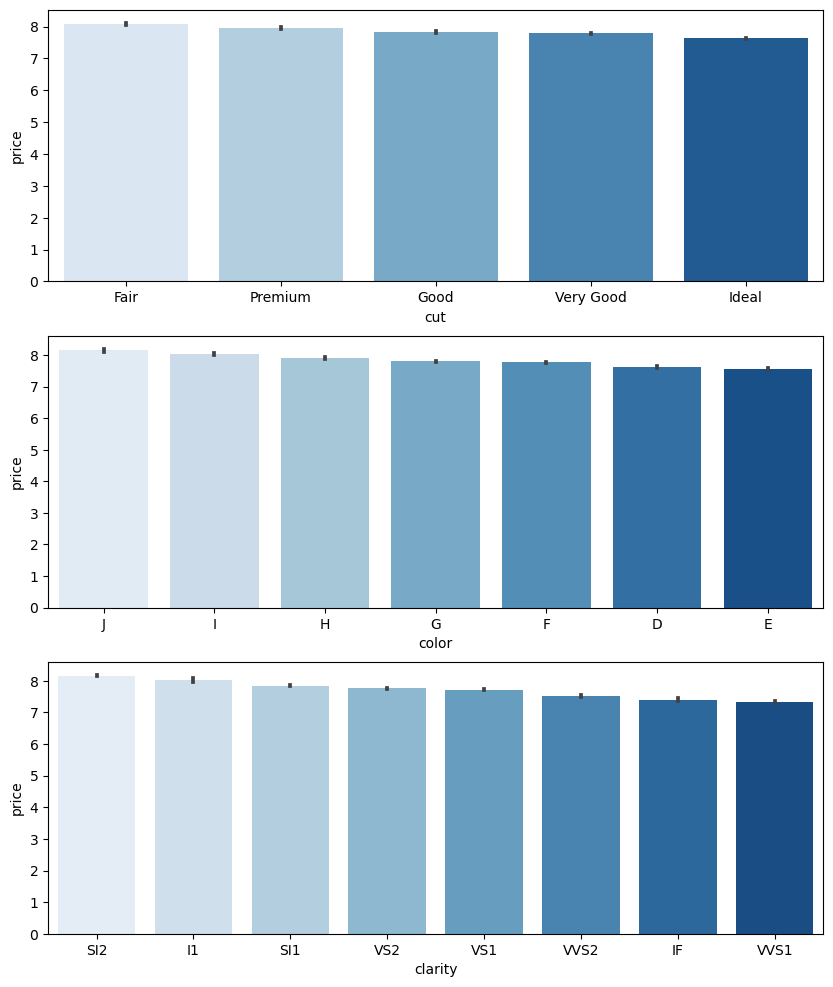

In [98]:
f, ax = plt.subplots(3, figsize=(10,12))

orden = df_train.groupby('cut')['price'].mean().sort_values(ascending=False).index
sns.barplot(x='cut', y='price', data=df_train, palette='Blues', ax=ax[0], order=orden)

orden = df_train.groupby('color')['price'].mean().sort_values(ascending=False).index
sns.barplot(x='color', y='price', data=df_train, palette='Blues', ax=ax[1], order=orden)

orden = df_train.groupby('clarity')['price'].mean().sort_values(ascending=False).index
sns.barplot(x='clarity', y='price', data=df_train, palette='Blues', ax=ax[2], order=orden)

plt.show()

In [99]:
def custom_encoder(dataframe, column_name, encoding_order):

    encoding_dict = {value: index for index, value in enumerate(encoding_order)}
    dataframe[column_name + '_encoded'] = dataframe[column_name].map(encoding_dict)
    return dataframe


In [101]:
orden = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
df_train = custom_encoder(df_train, 'cut', orden)
df_train.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded
0,0,-0.625,Premium,D,SI2,0.4,0.333333,-0.754098,-0.78022,-0.75,6.353,1


In [102]:
orden = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
df_train = custom_encoder(df_train, 'color', orden)
df_train.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded
0,0,-0.625,Premium,D,SI2,0.4,0.333333,-0.754098,-0.78022,-0.75,6.353,1,0


In [103]:
# https://www.diamonds.pro/education/clarity/
orden = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
df_train = custom_encoder(df_train, 'clarity', orden)
df_train.head(1)

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0,-0.625,Premium,D,SI2,0.4,0.333333,-0.754098,-0.78022,-0.75,6.353,1,0,6


In [104]:
df_train.drop(['cut', 'color', 'clarity'], axis=1, inplace=True)
df_train.head(1)

,id,carat,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
0,0,-0.625,0.4,0.333333,-0.754098,-0.78022,-0.75,6.353,1,0,6


In [105]:
df_train.isnull().sum()

id                 0
carat              0
depth              0
table              0
x                  0
y                  0
z                  0
price              0
cut_encoded        0
color_encoded      0
clarity_encoded    0
dtype: int64

In [106]:
df_train.shape

(40455, 11)